In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For Warnings 
import warnings 
warnings.filterwarnings('ignore')

# For Options 
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

# For Data Viz. 
import matplotlib.pyplot as plt 
import seaborn as sns 

# For Preprocessing. 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder 

# For Pipeline and ColumnTransformer. 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 

# For ML Models. {Classification}
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 

# Sklearn - Metrics 
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



#### a credit score of 700 or above is generally considered good.

In [2]:
# let's import dataset first. 

df = pd.read_csv('credit_data.csv')
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [3]:
df1 = df.copy()

In [4]:
df1 = df1.drop(['City' , 'State' , 'Occupation'] , axis = 1)

In [5]:
# Credit Score Converter. 

credit_class = []
def credit_score_func(df , credit) : 

    for i in df[credit] : 
        if i > 800 :
            credit_class.append(1)
        else : 
            credit_class.append(0)

credit_score_func(df1 , 'Credit Score')
            

In [6]:
df1['Credit Score Class'] = pd.DataFrame(credit_class)

In [7]:
features = df1.drop('Credit Score Class' , axis = 1)
label = df1['Credit Score Class']

In [8]:
# Get Seperate cat_cols and num_cols 

def cat_num_func(df) : 
    
    cat_col = df.select_dtypes(include = 'object').columns
    num_col = df.select_dtypes(exclude = 'object').columns 
    
    return cat_col , num_col 

cat_col , num_col = cat_num_func(features)

print(f"Categorical columns: {cat_col} \nNumerical columns: {num_col}")

Categorical columns: Index(['Gender', 'Existing Customer', 'Employment Profile'], dtype='object') 
Numerical columns: Index(['Age', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure', 'LTV Ratio',
       'Profile Score'],
      dtype='object')


In [9]:
# Missing vals in cat_col ? 

def missing_func(df , col) : 
    
    for i in df[col] : 
        print(f"{i} : {df[i].isnull().sum()}")
        
missing_func(features , cat_col)

Gender : 0
Existing Customer : 0
Employment Profile : 0


In [10]:
# Missing vals in num_col ?

missing_func(features , num_col)


Age : 0
Income : 0
Credit Score : 0
Credit History Length : 0
Number of Existing Loans : 0
Loan Amount : 0
Loan Tenure : 0
LTV Ratio : 0
Profile Score : 0


In [11]:
# unique values of cat_cols. 

def unique_vals_func(df , cat_col) : 
    
    for i in df[cat_col] : 
        print(f"{i} : {df[i].unique()}")

unique_vals_func(features , cat_col)

Gender : ['Male' 'Other' 'Female']
Existing Customer : ['No' 'Yes']
Employment Profile : ['Salaried' 'Self-Employed' 'Freelancer' 'Student' 'Unemployed']


In [12]:
numerical_transformer = Pipeline(
    steps = [
        ('stand_scaler' , StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps = [
        ('ord_encoder' , OrdinalEncoder())
    ]
)

ct = ColumnTransformer(
    transformers = [
        ('num_col_transformer' , numerical_transformer , num_col ) , 
        ('cat_col_transformer' , categorical_transformer , cat_col)] , remainder = 'passthrough')

In [13]:
features.head(1)

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,LTV Ratio,Employment Profile,Profile Score
0,31,Male,36000,604,487,5,109373,221,No,90.94343,Salaried,77


In [14]:
label[:1]

0    0
Name: Credit Score Class, dtype: int64

In [15]:
features = ct.fit_transform(features)

In [16]:
from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split(features , label , stratify = label , random_state = 42)

print(f"x train shape: {x_train.shape}\ny train shape : {y_train.shape}\nx test shape : {x_test.shape}\ny test shape : {y_test.shape}")

x train shape: (209892, 12)
y train shape : (209892,)
x test shape : (69964, 12)
y test shape : (69964,)


In [17]:
lr_model = LogisticRegression()

lr_model.fit(x_train , y_train)

lr_model.score(x_train , y_train)

0.9989994854496598

In [18]:
y_pred_lr = lr_model.predict(x_test)

In [19]:
acc = accuracy_score(y_test , y_pred_lr)
print(acc)

0.9990995369046939


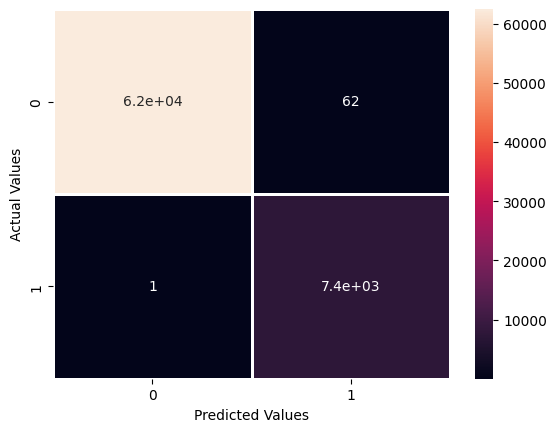

In [20]:
cm = confusion_matrix(y_test , y_pred_lr)
sns.heatmap(cm , annot = True , linewidth = 1)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [21]:
print(classification_report(y_test , y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62515
           1       0.99      1.00      1.00      7449

    accuracy                           1.00     69964
   macro avg       1.00      1.00      1.00     69964
weighted avg       1.00      1.00      1.00     69964



In [25]:
import joblib
# Save the Model and Transformer
joblib.dump(lr_model, 'vehicle_model.pkl')
joblib.dump(ct, 'vehicle_transformer.pkl')

['vehicle_transformer.pkl']

In [26]:
# Prediction Function
def predict_credit_score(input_data):
    model = joblib.load('vehicle_model.pkl')
    transformer = joblib.load('vehicle_transformer.pkl')
    input_transformed = transformer.transform(pd.DataFrame([input_data]))
    prediction = model.predict(input_transformed)
    return 'Vehicle Loan Approved' if prediction[0] == 1 else 'Vehicle Loan Rejected'
# Example Usage
input_data = {'Gender': 'Male', 'Existing Customer': 'Yes', 'Employment Profile': 'Salaried', 'Age': 35, 'Income': 50000, 'Credit Score': 750, 'Credit History Length': 5, 'Number of Existing Loans': 2, 'Loan Amount': 10000, 'Loan Tenure': 12, 'LTV Ratio': 80, 'Profile Score': 75}
print(predict_credit_score(input_data))

Vehicle Loan Rejected
